# Simpsons Haiku Demo 
## [@SimpsonsHaiku](https://twitter.com/SimpsonsHaiku)

For anyone who knows me, they'll attest that The Simpsons has had an undue impact on my life, being formative through my early years and enduring to the present moment. That contribution spanned curating a sense of humour deeply anchored in an appreciation for the surreal, a continued love of animation, or exposure to the depths of obscure Americana (thank you, John Swartwzelder).

This notebook demonstrates the implementation of an idea I had long ago, inspired by [@nythaikus](https://twitter.com/nythaikus). The dataset used here is hosted [on Kaggle here](https://www.kaggle.com/datasets/prashant111/the-simpsons-dataset), and was originally scraped by [Todd Schneider](https://toddwschneider.com/posts/the-simpsons-by-the-data/), covering the first 26 seasons. We start by loading the core haiku object, of class `SimpsonsHaiku`, and extracting a DataFrame of haikus.

In [1]:
import compuglobal
import matplotlib.pyplot as plt
from haiku import *

In [2]:
simpsons_haiku = SimpsonsHaiku()

100%|███████████████████████████████████████████████████████████████████████| 400696/400696 [00:08<00:00, 47162.70it/s]


In [3]:
# Generate haiku_df, will do so from scratch here but will load from path if it is passed when instantiating SimpsonsHaiku object
haiku_df = simpsons_haiku.generate_haiku_df(save=True)

100%|█████████████████████████████████████████████████████████████████████████| 30151/30151 [00:02<00:00, 11966.87it/s]


In [4]:
# Subsequent calls will use the object's already-defined `haiku_df` attribute
haiku, metadata = simpsons_haiku.generate_haiku()
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[17], S13E22
You can let me go
but I'll just keep exposing
myself at the mall


## Exploratory data analysis

Have you ever wondered which season of The Simpsons had the most haikus? How the average syllable-per-word count trended over the seasons? The maxiumum number of characters that contribute to a 17-syllable sequence of dialogue?  Well here's the notebook section for you!  

In [5]:
# Max number of lines of dialogue in a 17-syllable sequence? It's 16 (Lisa the Simpson)
haiku_df['n_lines'] = haiku_df.number.apply(len)
haiku_df[haiku_df.n_lines == haiku_df.n_lines.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines
episode_id,,,,,,,,,,,,,,,,,,,,
195,"[54908, 54908, 54908, 54909, 54909, 54909, 549...","[135, 135, 135, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 629000, 629000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Woo Oh Oh Yeah Ha Ha Ha Ha Ha Ha Ha ...,"[9, 11, 12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]",16
195,"[54908, 54908, 54909, 54909, 54909, 54909, 549...","[135, 135, 136, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 629000, 639000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Oh Oh Yeah Ha Ha Ha Ha Ha Ha Ha Ha ...,"[11, 12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]",16
195,"[54908, 54909, 54909, 54909, 54909, 54909, 549...","[135, 136, 136, 136, 136, 136, 136, 136, 136, ...","[Bart Simpson: Yes! Heh, heh! / Ha! Ha! / Woo ...","[629000, 639000, 639000, 639000, 639000, 63900...","[True, True, True, True, True, True, True, Tru...","[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Bart Simpson, Bart Simpson, Bart Simpson, Bar...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Yes! Heh, heh! / Ha! Ha! / Woo hoo hoo heh he...",[yes heh heh ha ha woo hoo hoo heh heh woo oh ...,"[13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[195, 195, 195, 195, 195, 195, 195, 195, 195, ...",Lisa the Simpson,9,17,Oh Yeah Ha Ha Ha Ha Ha Ha Ha Ha All ...,"[12, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 1, 2, 3, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]",16


In [6]:
# Max number of unique characters in a 17-syllable sequence? It's Homer 3D in Treehouse of Horror VI, with 9 characters. Did anyone see the movie Tron?
haiku_df['n_characters'] = haiku_df.character_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_characters == haiku_df.n_characters.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters
episode_id,,,,,,,,,,,,,,,,,,,,,
134,"[38660, 38661, 38662, 38663, 38664, 38665, 386...","[223, 224, 225, 226, 227, 228, 229, 230, 231, ...","[Marge Simpson: No., Bart Simpson: No., Patty ...","[1105000, 1106000, 1106000, 1106000, 1107000, ...","[True, True, True, True, True, True, True, Tru...","[1.0, 8.0, 10.0, 71.0, 11.0, 22.0, 442.0, 140....","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Marge Simpson, Bart Simpson, Patty Bouvier, C...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[No., No., No., No., No., No., No., No., Yes. ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 4]","[134, 134, 134, 134, 134, 134, 134, 134, 134, ...",Treehouse of Horror VI,7,6,No No No No No No No No Yes I mean no No Wel...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4]",12,9


In [7]:
# How about locations?
haiku_df['n_locations'] = haiku_df.location_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_locations == haiku_df.n_locations.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters,n_locations
episode_id,,,,,,,,,,,,,,,,,,,,,
53,"[16001, 16003, 16005, 16007, 16008]","[105, 107, 109, 111, 112]","[Apu Nahasapeemapetilon: (PLEASED, TO SELF) Oo...","[442000, 460000, 471000, 476000, 485000]","[True, True, True, True, True]","[208.0, 8.0, 90.0, 90.0, 91.0]","[136.0, 1.0, 585.0, 586.0, 586.0]","[Apu Nahasapeemapetilon, Bart Simpson, Eddie, ...","[Kwik-E-Mart, Street, Warehouse District, OUTD...","[Ooh, they used nylon rope this time. It feels...",...,"[53, 53, 53, 53, 53]",Separate Vocations,3,18,"Almost sensuous Oh, baby Damn boxes He's trap...","[3, 1, 1, 1, 1]","[5, 3, 3, 2, 4]",5,4,4
417,"[118649, 118652, 118654, 118656]","[215, 218, 220, 222]","[Cow In Truck: (ANNOYED GRUNT, THEN) I mean (P...","[1102000, 1107000, 1108000, 1110000]","[True, True, True, True]","[5188.0, 2.0, 2.0, 1.0]","[2231.0, 3421.0, 3422.0, 102.0]","[Cow In Truck, Homer Simpson, Homer Simpson, M...","[Rural Road, TRANSPORT VEHICLE, COW SUIT, Marg...","[I mean, Okay, they bought it., Have you got L...",...,"[417, 417, 417, 417]",Apocalypse Cow,19,17,"I mean Okay, they bought it Have you got Lou i...","[1, 1, 1, 1]","[2, 5, 7, 3]",4,3,4


### Plots

Text(0.5, 1.0, 'Number of haikus per season')

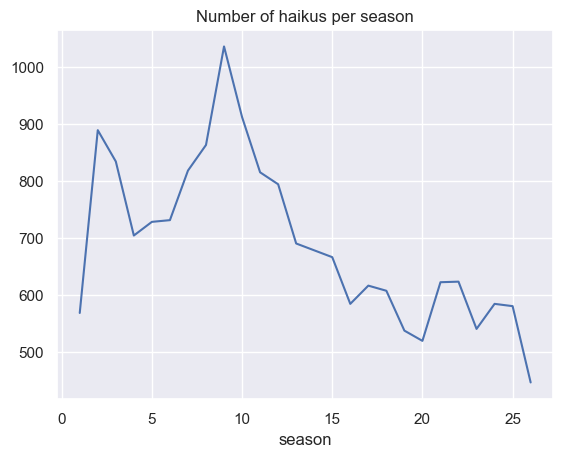

In [8]:
# Distribution by Season
import seaborn as sns
sns.set()

haiku_df.groupby('season').count()['id_x'].plot()
plt.title('Number of haikus per season')

Perhaps to your surprise, season 9 is off the charts in terms of haiku content. And there is an overall trend of haikus decreasing over the years. Who knew! Looking at the top episodes in terms of haiku count:

### Episodes by haiku count

In [9]:
# Which episode(s) have the most haikus?
haiku_df.reset_index().groupby('episode_id')[['title', 'season', 'number_in_season']].value_counts().sort_values(ascending=False).head(20)

episode_id  title                                    season  number_in_season
9           Life on the Fast Lane                    1       9                   63
203         Natural Born Kissers                     9       25                  61
14          Bart Gets an "F"                         2       1                   60
255         The Great Money Caper                    12      7                   59
206         Bart the Mother                          10      3                   59
194         Dumbbell Indemnity                       9       16                  57
195         Lisa the Simpson                         9       17                  57
190         Bart Carny                               9       12                  56
196         This Little Wiggy                        9       18                  56
33          The War of the Simpsons                  2       20                  54
148         Bart on the Road                         7       20                  5

In [10]:
# Which episode(s) have the least haikus?
haiku_df.reset_index().groupby('episode_id')[['title', 'season', 'number_in_season']].value_counts().sort_values(ascending=True).head(20)

episode_id  title                                  season  number_in_season
189         All Singing, All Dancing               9       11                  12
286         Gump Roast                             13      17                  13
112         Homer Badman                           6       9                   13
337         All's Fair in Oven War                 16      2                   13
543         The Man Who Grew Too Much              25      13                  14
496         Politically Inept, with Homer Simpson  23      10                  14
556         Treehouse of Horror XXV                26      4                   15
71          Marge vs. the Monorail                 4       12                  15
391         Springfield Up                         18      13                  15
504         Beware My Cheating Bart                23      18                  15
284         Blame It on Lisa                       13      15                  16
394         Homerazzi 

In [11]:
base_script = pd.read_csv('dataset/simpsons_script_lines.csv', on_bad_lines='skip', dtype={'word_count': float}).dropna(subset=['word_count'])
# episode_data = pd.read_csv('dataset/simpsons_episodes.csv')[['id', 'title', 'season', 'number_in_season']]
# base_script = pd.merge(base_script, episode_data, how='left', left_on='episode_id', right_on='id')

# base_script['n_syllables'] = base_script.spoken_words.progress_apply(simpsons_haiku.count_syllables_line)
# base_script.groupby('season')['n_syllables'].mean().plot(label='Mean syllables per line')
# base_script.groupby('season')['word_count'].mean().plot(label='Mean words per line')

# plt.title('Mean number of words per line by season (Original script)')
# plt.legend()

ValueError: could not convert string to float: 'true'

In [ ]:
base_script[base_script.word_count == 'TRUE']

In [ ]:
# This the ratio of the two lines above
plt.title('Mean number of syllables per word by season')
(base_script.groupby('season')['n_syllables'].sum() / base_script.groupby('season')['word_count'].sum()).plot(color='g')

In [ ]:
# Distribution of haikus by syllable count of constituent diaglogue lines
haiku_df.n_syllables.value_counts().head(20)

## Generating haikus
This section generates haikus, demonstrating the usage of the `syllable_patterns` and `golden_age` parameters.

In [ ]:
# Higher quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[5,7,5], [17], [5, 12], [12, 5]], golden_age=True)
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

In [ ]:
# Medium quality? Two line breaks
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[9, 8], [8, 9], [10, 7], [7, 10], [6, 11], [11, 6]], golden_age=True)
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

In [ ]:
# Lower quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[5, 5, 7]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

## Appendix

This section demonstrates some the functionality associated with the SimpsonsTwitterBot class, particularly querying GIFs from the Frinkiac API via the package `compuglobal`, as well as debugging.

In [ ]:
from twitter import SimpsonsTwitterBot

# Generate frinkiac gifs and images from a haiku - S4E17 Last Exit to Springfield
haiku_query = """It doesn't take a
                 whiz to see that you're looking 
                 out for number one"""

simpsons_bot = SimpsonsTwitterBot(
        auth_dict=json.load(open('auth.json')), 
        haiku_df='haiku_df.csv'
    )

image_url, meme_url, gif_url, mp4_url = simpsons_bot.search_frinkiac(haiku_query, episode_key='S04E17')

In [ ]:
import compuglobal 
simpsons = compuglobal.Frinkiac()


episode_key = 'S{:02d}E{:02d}'.format(metadata['season'].values[0], metadata['number_in_season'].values[0])

gif_url, image_url = None, None
search_results = simpsons.search(haiku)
for result in search_results:
    if result.key == episode_key:
        screencap = simpsons.get_screencap(result.key, 
                                           result.timestamp)
        image_url = screencap.get_image_url()
        gif_url = screencap.get_gif_url()
        
        break

In [ ]:
image_url

In [ ]:
gif_url

In [ ]:
mp4_url

In [ ]:
# Check syllable counts
for word in "What is it sweetie Nelson's a great quarterback He's carryin' this team".split():
    print(word, simpsons_haiku.num_syllables(word))

In [ ]:
# Search script for line - used in debugging
def fun(x):
    if isinstance(x, float):
        return False
    else:
        return "the fact that it" in x
    
base_script[base_script.spoken_words.apply(fun)].spoken_words.values

In [ ]:
def format_row_as_haiku(row):
    
    haiku = row['spoken_words_split']
    n_syl = row['n_syllables']
    if isinstance(haiku, pd.Series):
        haiku = haiku.values[0]
        n_syl = n_syl.values[0]
    
    words = haiku.replace('-', ' ').replace('/', ' ').split(' ')
    count = 0

    haiku_list = ['', '', '']
    syllable_list = [5, 12, 17]

    i = 0
    for word in words:
        for char in simpsons_haiku.strip_list:
            word = word.replace(char, '')
        if word:
            n_syllables = simpsons_haiku.num_syllables(word)
        else:
            n_syllables = 0 
        count += n_syllables

        if count > syllable_list[i]:
            i+=1

        haiku_list[i] += word + ' '
    
    return '\n'.join(haiku_list), n_syl
    
for i, row in haiku_df[haiku_df.title == "Marge vs. the Monorail"][['spoken_words_split', 'n_syllables']].iterrows():
    haiku, n_syllables = format_row_as_haiku(row)
    print(haiku)
    print(' ')
    print(n_syllables)
    print(' ')

In [ ]:
haiku_df_one_char = haiku_df[haiku_df.character_id.apply(lambda x: len(set(x)) == 1)]
haiku_df_one_char.n_syllables.value_counts()

In [ ]:
haiku = haiku_df_one_char.sample()
haiku, n_syl = format_row_as_haiku(haiku)
print(haiku)
print(n_syl)